## Iterables, iterators and generators

In [78]:
for x in [1,4,5,10]: print (x)

1
4
5
10


In [87]:
for key in {'GOOGLE': 490.10, 'YAHOO': 21.71}:
    print(key)

GOOGLE
YAHOO


In [79]:
for c in "Mars!": print(c)

M
a
r
s
!


Statements such as `loop` can be applied to many different types, as long as object is iterable, i.e. returns an iterator when asked for one using the `obj.__iter__()`method or the equivsalent builtin function `iter`: `iter(obj)` 

In [88]:
iter([1,2,3]), iter(range(9)), iter("dsadsa")

(<list_iterator at 0x1d41c92cc08>,
 <str_iterator at 0x1d41c92cc48>)

In [90]:
[1,2,3].__iter__(), range(9).__iter__(), "dsadsa".__iter__()

(<list_iterator at 0x1d41c938c88>,
 <str_iterator at 0x1d41c938e48>)

An iterator in turn has to support `iterator.__next__()` or the equivsalent builtin function `next`: `next(iterator)`  

In [94]:
iters = iter([1,2,3]), iter(range(9)), iter("dsadsa")
[next(it) for it in iters]

[1, 0, 'd']

The iterator protocol comes with two additional conditions: when running out of nexts, the iterator should raise the `StopIteration` exception, and the iterator should be iterable itself, i.e. reurn an iterator when `iter` is applied to it. An iterator will normally return itself in these cases. 

In [96]:
[iter(it) for it in iters], iters

([<list_iterator at 0x1d41c95c588>,
 (<list_iterator at 0x1d41c95c588>,
  <str_iterator at 0x1d41c95c708>))

In [110]:
for it in iters:
    try:
        while True:
            print(next(it), end=' ')
    except StopIteration:
        print(it, 'is exhausted')

<list_iterator object at 0x000001D41C95C588> is exhausted
<range_iterator object at 0x000001D41B814CF0> is exhausted
<str_iterator object at 0x000001D41C95C708> is exhausted


In [100]:
# if try this run again, you'll see they remain exhausted:
for it in iters:
    try:
        while True:
            print(next(it))
    except StopIteration:
        print(it, 'is exhausted')

<list_iterator object at 0x000001D41C95C588> is exhausted
<range_iterator object at 0x000001D41B814CF0> is exhausted
<str_iterator object at 0x000001D41C95C708> is exhausted


In [109]:
# of course we can make new iterators whenever starting the loop:
for it in iter([1,2,3]), iter(range(9)), iter("dsadsa"):
    try:
        while True:
            print(next(it), end=' ')
    except StopIteration:
        print(it, 'is exhausted')

1 2 3 <list_iterator object at 0x000001D41C8DB948> is exhausted
0 1 2 3 4 5 6 7 8 <range_iterator object at 0x000001D41AA259F0> is exhausted
d s a d s a <str_iterator object at 0x000001D41C8DBC48> is exhausted


In [117]:
for x in range(5): print(x, end=' ')
print()   
_it = iter(range(5))
while True:
    try: x = next(_it)
    except StopIteration: break
    print(x, end=' ')

0 1 2 3 4 
0 1 2 3 4 

In [125]:
# Build our own iterator (and iterable)

class Countdown(object):
    def __init__(self,start):
        self.count = start
    def __iter__(self):
        return self
    def __next__(self):
        if self.count <= 0:
            raise StopIteration
        r = self.count
        self.count -= 1
        return r
for x in Countdown(4): print(x)

4
3
2
1


### Comprehensions and generator expressions
Essence of iterators is **laziness**: the next value is generated on demand, does not have to be there already. The for loop is often used not just to run through a sequence, but transform the elements in that sequence as one step in a processing pipeline. The drawback of using that statement is that it is setup to handle the whole sequence in one run (interrupting and proceeding later can be done, but requires lot of user administration and is clumsy to say the least). Would it not be nice if the for loop itself could also be lazy, and itself produce an iterator that waits for a next call before doing its thing to the next item in the sequence (iterator) it is working on? 

Python allows the use of `for .. in ..` not just as a statement, but also as an operator in a generator expression. 

In [135]:
# say I want to add up my counter values:
n = 100
print('Value of n:', n)
l = []    
for n in CountDown(4):
    l.append(n)
print(sum(l))
print('Value of n:', n)  # side effect on my global n!
# or:
tot = 0    
for n in CountDown(4):
    tot += n
print(tot)
c = 100
print('Value of c:', c)
# much nicer if I could just say:
sum(c for c in CountDown(4))
print('Value of c:', c)  # no effect on my global c!

Value of n: 100
10
Value of n: 1
10
Value of c: 100
Value of c: 100


Easier to formulate and read, a bit faster, keeps "index" variables such as c local, allows functional composition, i.e use in more complex expressions.

In [136]:
(n for n in CountDown(7)), iter(n for n in CountDown(7))

(<generator object <genexpr> at 0x000001D41CD3ADC8>,
 <generator object <genexpr> at 0x000001D41CD3AEC8>)

In [139]:
list(n for n in CountDown(7)), [(n for n in CountDown(7))], [n for n in CountDown(7)], {n for n in CountDown(7)}

([7, 6, 5, 4, 3, 2, 1],
 [<generator object <genexpr> at 0x000001D41CD3AF48>],
 [7, 6, 5, 4, 3, 2, 1],
 {1, 2, 3, 4, 5, 6, 7})

The last two expressions above are examples of resp. **list comprehension** and **set comprehension**. The list or set delimiters basically force the generator expression to be run and return a list or set with the values returned. Note that by putting the parentheses around expression, it becomes an object in a one-item list! 
Dictionary comprehension is also possible:

In [141]:
keys = ['a', 'b', 'c']
values = [1, 2, 3]
{k.upper():v for k,v in zip(keys, values)}, {k.upper():0 for k in 'dict'}

({'A': 1, 'B': 2, 'C': 3}, {'D': 0, 'I': 0, 'C': 0, 'T': 0})

In [149]:
# note that zip also returns an iterator:
z = zip(keys, values)
z, iter(z), list(z), tuple(z)  # exhausted when called a second time

(<zip at 0x1d41ce423c8>,
 [('a', 1), ('b', 2), ('c', 3)],
 ())

In [162]:
[tuple(keys), tuple(values)] == [*zip(*zip(keys, values))]
print(zip(keys, values), 'contains', *zip(keys, values))
[*zip(*zip(keys, values))]

<zip object at 0x000001D41C8F8548> contains ('a', 1) ('b', 2) ('c', 3)


[('a', 'b', 'c'), (1, 2, 3)]

In [168]:
range(9), iter(range(9))

(range(0, 9), <range_iterator at 0x1d41b81a850>)

In [173]:
range(9), iter(range(9)), *range(9)

(range(0, 9), <range_iterator at 0x1d41b81aa50>, 0, 1, 2, 3, 4, 5, 6, 7, 8)

In [176]:
[x*2 for x in range(9)]

[0, 2, 4, 6, 8, 10, 12, 14, 16]

In [175]:
[x*2 for x in range(9) if x % 3]

[2, 4, 8, 10, 14, 16]

In [177]:
[x*y for x in range(9) for y in range(1,3)]

[0, 0, 1, 2, 2, 4, 3, 6, 4, 8, 5, 10, 6, 12, 7, 14, 8, 16]

In [178]:
[x*y for x in range(9) for y in range(1,3) if x % 3]

[1, 2, 2, 4, 4, 8, 5, 10, 7, 14, 8, 16]

In [181]:
[x*y if x != y else 100 for x in range(9) for y in range(1,3) if x % 3]

[100, 2, 2, 100, 4, 8, 5, 10, 7, 14, 8, 16]

In [182]:
{x*y if x != y else 100 for x in range(9) for y in range(1,3) if x % 3}

{2, 4, 5, 7, 8, 10, 14, 16, 100}

In [185]:
map(lambda x,y: x+y, range(9), range(9))

[0, 2, 4, 6, 8, 10, 12, 14, 16]

In [185]:
list(map(lambda x,y: x+y, range(9), range(9)))

[0, 2, 4, 6, 8, 10, 12, 14, 16]

In [188]:
filter(lambda x: x % 3, range(9))

In [187]:
list(filter(lambda x: x % 3, range(9)))

[1, 2, 4, 5, 7, 8]

### Generators
More convenient way to create iterator.

In [190]:
def countdown(n): # generator function, produces generator object
    while n > 0:
        yield n
        n -= 1
[x for x in countdown(5)]

[5, 4, 3, 2, 1]

In [192]:
gen = countdown(5)
while True: print(next(gen))

5
4
3
2
1


StopIteration: 

In [193]:
def simple():
    yield 'enter'
    yield 'exit'
s = simple()
next(s), next(s)

('enter', 'exit')

In [195]:
import re
pat = re.compile(r'\w+')

class Sentence:
    
    def __init__(self, text):
        self.text = text
        self.words = pat.findall(text)

    def __repr__(self):
        return 'Sentence(%s)' % repr(self.text)

    def __iter__(self):
        for word in self.words:
            yield word
        return
[w for w in Sentence("Essence of iterators is **laziness**")]

['Essence', 'of', 'iterators', 'is', 'laziness']

In [197]:
# generator version
import re
pat = re.compile(r'\w+')

class Sentence:
    
    def __init__(self, text):
        self.text = text    # no word list

    def __repr__(self):
        return 'Sentence(%s)' % repr(self.text)

    def __iter__(self):
        for match in pat.finditer(self.text):
            yield match.group()     # yielded on demand

[w for w in Sentence("Essence of iterators is **laziness**")]

['Essence', 'of', 'iterators', 'is', 'laziness']

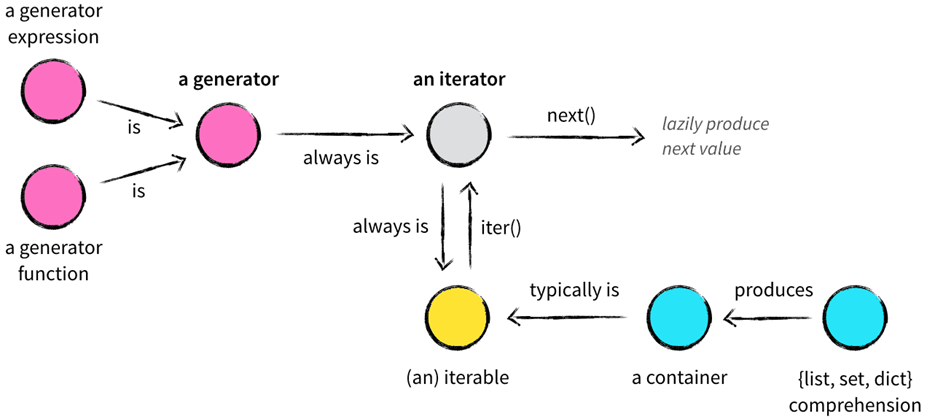

In [200]:
log = ['81.107.39.38 - ... "GET /ply/ HTTP/1.1" 200 7587',
'81.107.39.38 - ... "GET /favicon.ico HTTP/1.1" 404 133',
'81.107.39.38 - ... "GET /ply/bookplug.gif HTTP/1.1" 200 23903',
'81.107.39.38 - ... "GET /ply/ HTTP/1.1" 304 -']

total = 0
for line in log:
    bytestr = line.rsplit(None,1)[1]
    if bytestr != '-':
        total += int(bytestr)
total

31623

In [201]:
entries = (line.rsplit(None,1)[1] for line in log)
sum(int(x) for x in entries if x != '-')

31623

In [204]:
sum(int(x) for x in (line.rsplit(None,1)[1] for line in log) if x != '-')

31623

In [225]:
def chain(iterables):
    for it in iterables:
        for i in it:
            yield i
            
print(*chain(range(i) for i in range(7)))

0 0 1 0 1 2 0 1 2 3 0 1 2 3 4 0 1 2 3 4 5


`yield from` offers convenient way to yield from nested generators

In [226]:
def chain(iterables):
    for it in iterables:
        yield from it
        
print(*chain(range(i) for i in range(7)))

0 0 1 0 1 2 0 1 2 3 0 1 2 3 4 0 1 2 3 4 5


In [231]:
def fibonacci(max):
    assert max>0, 'max should be > 0'
    a, b = 0, 1
    while a < max:
        yield a
        a, b = b, a+b
fibonacci(200)

<generator object fibonacci at 0x000001D41C994CC8>

In [234]:
list(fibonacci(200))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]